In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.utils import shuffle

In [4]:
df=pd.read_csv('final0.csv')
x=df.drop('Activity Label', axis=1)
y=df['Activity Label']

x_shuffled, y_shuffled = shuffle(x, y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size=0.2, stratify=y_shuffled, random_state=42)

<h2>Comapring different model performance on the whole dataset<h2>

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2679
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 472
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       914
           1       0.86      0.88      0.87      1619

    accuracy                           0.83      2533
   macro avg       0.82      0.81      0.81      2533
weighted avg       0.83      0.83      0.83      2533

Classification Report for XGBoost:

              precision    recall  f1-score   sup

c:\Users\SUJAL GULIA\anaconda3\envs\amyloid_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       914
           1       0.81      0.86      0.84      1619

    accuracy                           0.79      2533
   macro avg       0.77      0.76      0.76      2533
weighted avg       0.78      0.79      0.78      2533

Classification Report for K Neighbor Classifier:

              precision    recall  f1-score   support

           0       0.72      0.60      0.65       914
           1       0.79      0.87      0.83      1619

    accuracy                           0.77      2533
   macro avg       0.76      0.73      0.74      2533
weighted avg       0.77      0.77      0.76      2533

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.74      0.16      0.26       914
           1       0.67      0.97      0.79      1619

    accuracy                           0.68      253

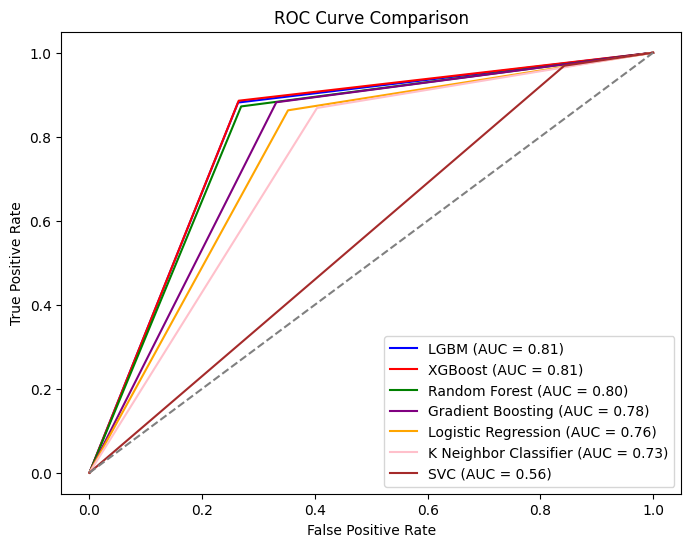

In [ ]:
models = {
    "LGBM": (LGBMClassifier(random_state=42), 'blue'),
    "XGBoost": (xgb.XGBClassifier(random_state=42), 'red'),
    "Random Forest": (RandomForestClassifier(random_state=42), 'green'),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), 'purple'),
    "Logistic Regression": (LogisticRegression(), 'orange'),
    "K Neighbor Classifier": (KNeighborsClassifier(), 'pink'),
    "SVC": (SVC(), 'brown')
}

plt.figure(figsize=(8, 6))

for name, (model, color) in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

From here it can be noticed that XGBoost classifier and LightGBM classifier is best performing, with accuracy of 83% and AUC score of 0.81, while second best performing model is RandomForestClassifier, with accuracy of 82% and AUC score of 0.80

<h2>Comparing different models performances on structural fingerprint<h2>

In [12]:
mgfeatures=[col for col in df.columns if col.startswith('Morgan')]
a=df[mgfeatures]

maccsfeatures=[col for col in df.columns if col.startswith('MACCS')]
b=df[maccsfeatures]

rdkitfeatures=[col for col in df.columns if col.startswith('RDKitFP')]
c=df[rdkitfeatures]

a_shuffled, b_shuffled, c_shuffled, y_shuffled = shuffle(a, b, c, y, random_state=42)

a_train, a_test, b_train, b_test, c_train, c_test, y_train, y_test = train_test_split(a_shuffled, b_shuffled, c_shuffled, y_shuffled, test_size=0.2, stratify=y_shuffled, random_state=42)

<h3>For Morgan Fingerprint<h3>

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       914
           1       0.85      0.87      0.86      1619

    accuracy                           0.82      2533
   macro avg       0.81      0.80      0.80      2533
weighted avg       0.82      0.82      0.82      2533

Classification Report for XGBoost:

              precision    recall  f1-score   supp

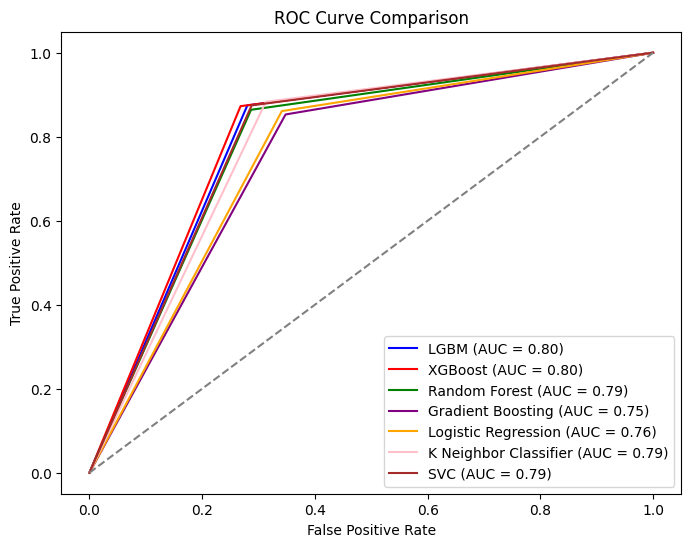

In [ ]:
plt.figure(figsize=(8, 6))

for name, (model, color) in models.items():
    model.fit(a_train, y_train)
    y_pred = model.predict(a_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

For Morgan fingerprint the XGBoost classifier and LightGBM classifier models performed well compared to others, with accuracy of 82% and AUC score fo 0.80, and second best performing model is KNeigbhorsClassifier with accuracy of 81% and AUC score 0.79

<h3>For MACCS keys<h3>

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       914
           1       0.82      0.88      0.85      1619

    accuracy                           0.80      2533
   macro avg       0.79      0.77      0.77      2533
weighted avg       0.80      0.80      0.80      2533

Classification Report for XGBoost:

              precision    recall  f1-score   suppor

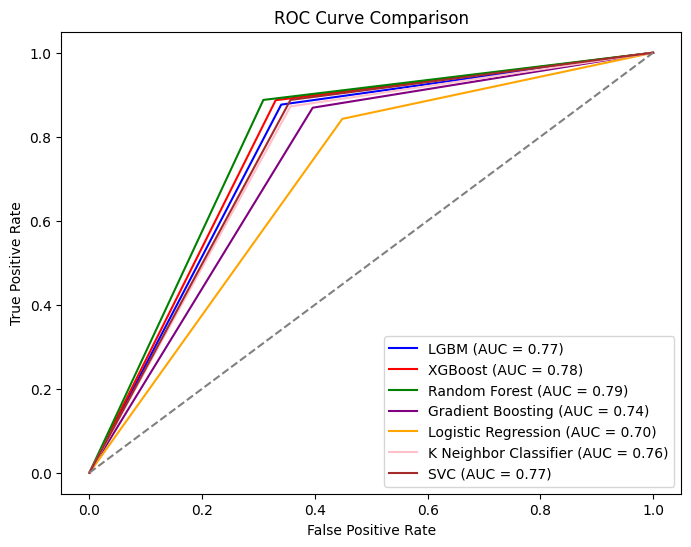

In [ ]:
plt.figure(figsize=(8, 6))

for name, (model, color) in models.items():
    model.fit(b_train, y_train)
    y_pred = model.predict(b_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

For MACCS key performance is quiet similar to Morgan fingerprint with XGBoost classifier, LightGBM classifier and RandomForestClassifier as best performing models, with accuracy of 81% and AUC score of 0.78, while the KNeighborsClassifier have accuracy of 79% and AUC score of 0.76

<h3>For RDKit Fingerprint<h3>

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       914
           1       0.85      0.90      0.87      1619

    accuracy                           0.83      2533
   macro avg       0.83      0.81      0.82      2533
weighted avg       0.83      0.83      0.83      2533

Classification Report for XGBoost:

              precision    recall  f1-score   supp

c:\Users\SUJAL GULIA\anaconda3\envs\amyloid_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       914
           1       0.81      0.88      0.84      1619

    accuracy                           0.79      2533
   macro avg       0.78      0.75      0.76      2533
weighted avg       0.79      0.79      0.78      2533

Classification Report for K Neighbor Classifier:

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       914
           1       0.85      0.89      0.87      1619

    accuracy                           0.83      2533
   macro avg       0.82      0.80      0.81      2533
weighted avg       0.82      0.83      0.82      2533

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       914
           1       0.85      0.89      0.87      1619

    accuracy                           0.83      253

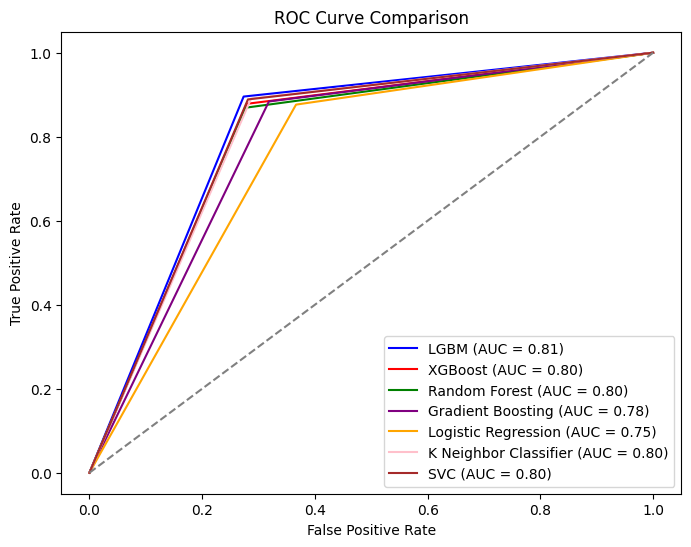

In [ ]:
plt.figure(figsize=(8, 6))

for name, (model, color) in models.items():
    model.fit(c_train, y_train)
    y_pred = model.predict(c_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

For RDKit fingerprint the best performing model is KNeighborsClassifier, with accuracy of 83% and AUC score of 0.80, while the RandomForestClassifier, XGBoost and LightGBM classifier performed similar with accuracy of 82% and AUC score of 0.80

<h3>For Morgan, MACCS and RDKit fingerprint combined<h3>

In [16]:
d=df[[col for col in df.columns if col.startswith('Morgan')] +
       [col for col in df.columns if col.startswith('MACCS')] +
       [col for col in df.columns if col.startswith('RDKitFP')]]
y=df['Activity Label']

d_shuffled, y_shuffled = shuffle(d, y, random_state=42)

d_train, d_test, y_train, y_test = train_test_split(d_shuffled, y_shuffled, test_size=0.2, stratify=y_shuffled, random_state=42)

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       914
           1       0.86      0.88      0.87      1619

    accuracy                           0.83      2533
   macro avg       0.82      0.81      0.82      2533
weighted avg       0.83      0.83      0.83      2533

Classification Report for XGBoost:

              precision    recall  f1-score   supp

c:\Users\SUJAL GULIA\anaconda3\envs\amyloid_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.75      0.68      0.72       914
           1       0.83      0.87      0.85      1619

    accuracy                           0.81      2533
   macro avg       0.79      0.78      0.78      2533
weighted avg       0.80      0.81      0.80      2533

Classification Report for K Neighbor Classifier:

              precision    recall  f1-score   support

           0       0.79      0.72      0.76       914
           1       0.85      0.89      0.87      1619

    accuracy                           0.83      2533
   macro avg       0.82      0.81      0.81      2533
weighted avg       0.83      0.83      0.83      2533

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       914
           1       0.86      0.89      0.87      1619

    accuracy                           0.83      253

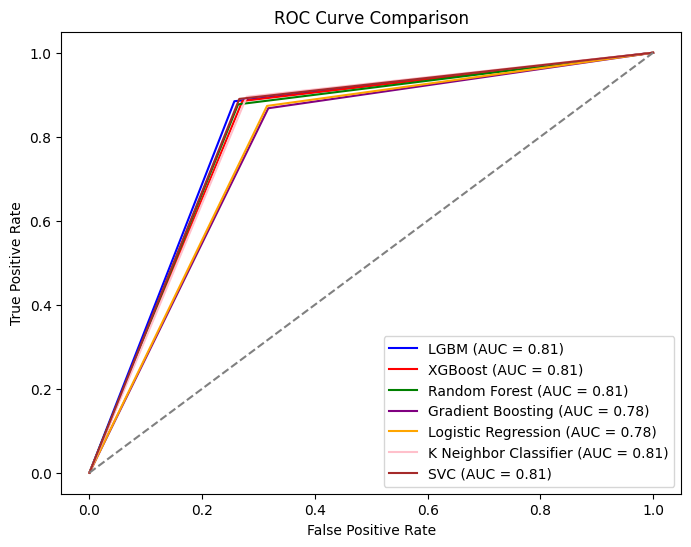

In [ ]:
plt.figure(figsize=(8, 6))

for name, (model, color) in models.items():
    model.fit(d_train, y_train)
    y_pred = model.predict(d_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

Here the best performing models are XGBoost classifier and LightGBM classifier, with accuracy of 83% and AUC score of 0.81, while second best model with nearly similar perfromance is KNeighborClassifier, with  a accuracy of 83% and AUC score of 0.80

<h2>Comparing different models performances on molecular descriptors<h2>

In [18]:
x=df[['MolWt', 'HAcceptors', 'TPSA', 'NumRings', 'FractionCSP3', 'ValenceElectrons', 'Heteroatoms', 'Chi0', 'Chi1', 'Kappa1']]
y=df['Activity Label']

x_shuffled, y_shuffled = shuffle(x, y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size=0.2, stratify=y_shuffled, random_state=42)

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1755
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.75      0.60      0.66       914
           1       0.80      0.89      0.84      1619

    accuracy                           0.78      2533
   macro avg       0.77      0.74      0.75      2533
weighted avg       0.78      0.78      0.78      2533

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       914
     

c:\Users\SUJAL GULIA\anaconda3\envs\amyloid_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for K Neighbor Classifier:

              precision    recall  f1-score   support

           0       0.66      0.55      0.60       914
           1       0.77      0.84      0.80      1619

    accuracy                           0.74      2533
   macro avg       0.72      0.70      0.70      2533
weighted avg       0.73      0.74      0.73      2533

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.75      0.11      0.20       914
           1       0.66      0.98      0.79      1619

    accuracy                           0.67      2533
   macro avg       0.71      0.55      0.49      2533
weighted avg       0.69      0.67      0.58      2533



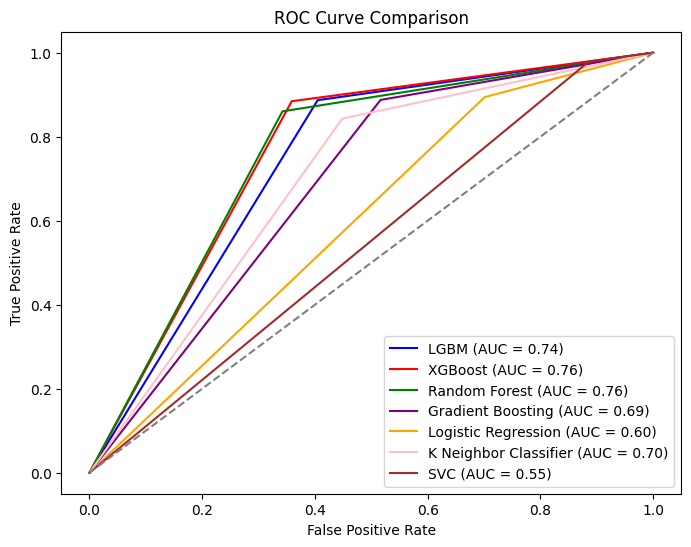

In [ ]:
plt.figure(figsize=(8, 6))

for name, (model, color) in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

For molecular descriptors the best performing model are XBGoost classifier and LightGBM classifier, with accuracy of 80% and AUC score of 0.76, and second best performing model is RandomForestClassifier, with accuracy of 79% with AUC score of 0.76

<h3>From this analysis it can be noted that the molecular descriptors have compartively low performance with structural fingerprints, and molecular descriptors and structural fingerprint combined, so I have decided to drop molecular descriptors as they are can introduce noise rather than improving the overall performance<h3>

In [20]:
df=df.drop(columns=['MolWt', 'HAcceptors', 'TPSA', 'NumRings', 'FractionCSP3', 'ValenceElectrons', 'Heteroatoms', 'Chi0', 'Chi1', 'Kappa1'])
df.head()

,Activity Label,Morgan_25,Morgan_31,Morgan_59,Morgan_65,Morgan_84,Morgan_119,Morgan_131,Morgan_149,Morgan_160,...,RDKitFP_1738,RDKitFP_1760,RDKitFP_1766,RDKitFP_1844,RDKitFP_1853,RDKitFP_1864,RDKitFP_1880,RDKitFP_1894,RDKitFP_1897,RDKitFP_2026
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0


In [21]:
df.to_csv('final1.csv', index=False)

<h3>From the comparison it can be noted that models are performing well (or similar) for fingerprints seprately and combined, so we will move on with training models on structural fingerprints combined<h3>

For better performance we will now try ensembling the models for better performance, before ensembling we will check the correlation matrix for different classifier error, in ensembling the models with low correlation in errors can lead to stronger generalization and improved overall performance.

In [5]:
df=pd.read_csv('final1.csv')

x=df[[col for col in df.columns if col.startswith('Morgan')] +
       [col for col in df.columns if col.startswith('MACCS')] +
       [col for col in df.columns if col.startswith('RDKitFP')]]
y=df['Activity Label']

x_shuffled, y_shuffled = shuffle(x, y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size=0.2, stratify=y_shuffled, random_state=42)

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554


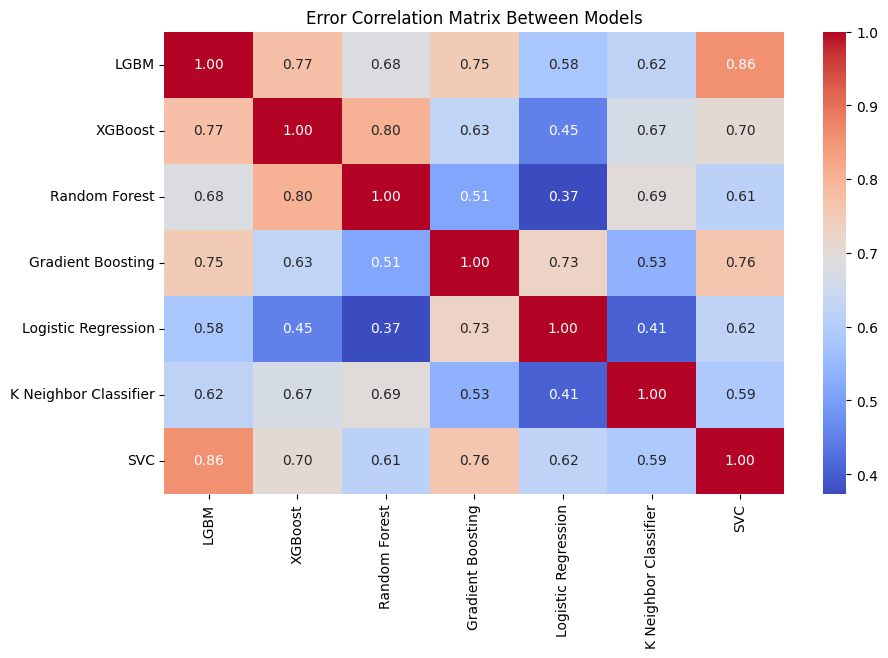

In [28]:
error_matrix = {}
for name, model in models.items():
    model.fit(b_train, y_train)
    y_pred = model.predict(b_test)
    misclassified = (y_pred != y_test).astype(int)
    error_matrix[name] = misclassified

error_df = pd.DataFrame(error_matrix)

corr_matrix = error_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Error Correlation Matrix Between Models")
plt.show()

In [35]:
ensemble1 = VotingClassifier(
    estimators=[('lgbm', LGBMClassifier()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier())],
    voting='soft'
)
ensemble1.fit(x_train, y_train)
final_pred = ensemble1.predict(x_test)

print(classification_report(y_test, final_pred))
print("ROC AUC Score:", roc_auc_score(y_test, final_pred))

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       914
           1       0.86      0.89      0.88      1619

    accuracy                           0.84      2533
   macro avg       0.83      0.82      0.82      2533
weighted avg       0.84      0.84      0.84      2533

ROC AUC Score: 0.8162074273905467


In [ ]:
ensemble2=VotingClassifier(
    estimators=[('xgb', xgb.XGBClassifier()), ('svc', SVC(probability=True))],
    voting='soft'
)

ensemble2.fit(x_train, y_train)
final_pred = ensemble2.predict(x_test)

print(classification_report(y_test, final_pred))
print("ROC AUC Score:", roc_auc_score(y_test, final_pred))

In [37]:
ensemble3 = VotingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier()), ('svc', SVC(probability=True))],
    voting='soft'
)

ensemble3.fit(x_train, y_train)
final_pred = ensemble3.predict(x_test)

print(classification_report(y_test, final_pred))
print("ROC AUC Score:", roc_auc_score(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       914
           1       0.86      0.90      0.88      1619

    accuracy                           0.84      2533
   macro avg       0.83      0.81      0.82      2533
weighted avg       0.84      0.84      0.84      2533

ROC AUC Score: 0.814945741421279


In [41]:
ensemble4 = VotingClassifier(
    estimators=[('knn', KNeighborsClassifier()), ('svc', SVC(probability=True))],
    voting='soft'
)
ensemble4.fit(x_train, y_train)
final_pred = ensemble4.predict(x_test)

print(classification_report(y_test, final_pred))
print("ROC AUC Score:", roc_auc_score(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       914
           1       0.86      0.90      0.88      1619

    accuracy                           0.84      2533
   macro avg       0.83      0.82      0.82      2533
weighted avg       0.84      0.84      0.84      2533

ROC AUC Score: 0.8164899044848983


[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554


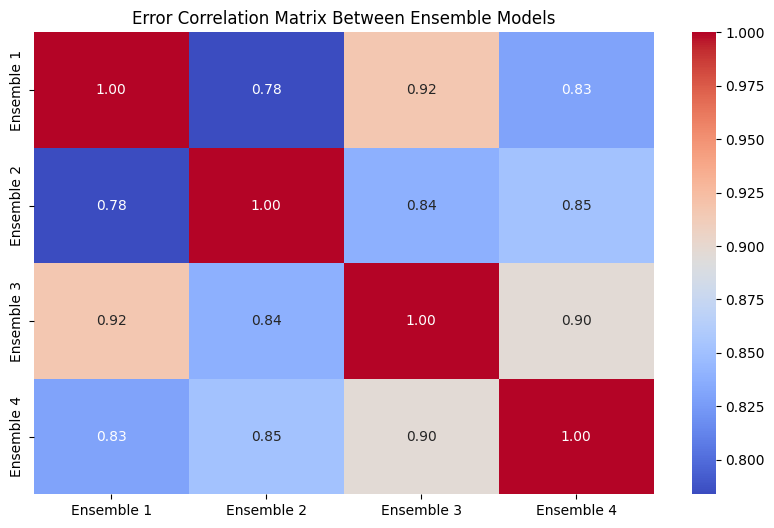

In [39]:
ensemble_models = {
    "Ensemble 1": ensemble1,
    "Ensemble 2": ensemble2,
    "Ensemble 3": ensemble3,
    "Ensemble 4": ensemble4
}

error_matrix = {}
for name, model in ensemble_models.items():
    model.fit(b_train, y_train)
    y_pred = model.predict(b_test)
    misclassified = (y_pred != y_test).astype(int)
    error_matrix[name] = misclassified

error_df = pd.DataFrame(error_matrix)

corr_matrix = error_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Error Correlation Matrix Between Ensemble Models")
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=[
        ('e1', ensemble1),
        ('e2', ensemble2)
    ],
    final_estimator=LogisticRegression()
)

stack.fit(x_train, y_train)
final_pred = stack.predict(x_test)
print(classification_report(y_test, final_pred))
print("ROC AUC Score:", roc_auc_score(y_test, final_pred))

[LightGBM] [Info] Number of positive: 6476, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639352 -> initscore=0.572554
[LightGBM] [Info] Start training from score 0.572554
[LightGBM] [Info] Number of positive: 5181, number of negative: 2922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 8103, number of used features: 456
[LightGBM] [Info] [binary